In [27]:
import pandas as pd

# 데이터 불러오기
livinglab = pd.read_csv("livinglab_final2.csv")

## 1. 토큰화

### 1) 토큰화 준비

In [28]:
from teanaps.nlp import MorphologicalAnalyzer

# 텍스트 데이터 토큰화
# TEANAPS 형태소 분석기를 불러오기
ma = MorphologicalAnalyzer()
ma.set_tagger("okt")

In [29]:
'''
일반명사(NNG), 고유명사(NNP), 동사(VV), 형용사(VA), 보조 용언(VX)
'''

#고려할 태그
tag_list = ['NNG','NNP','VV','VA','VX']

# 계산할 tag만 남기고 다른 품사는 제거
def remove_word_by_tag(token,tag_list):
  temp = list()
  for k in range(len(token)):
    if token[k][1] in tag_list:
      temp.append(token[k][:-1])
    else:
      continue
  return temp


# 형태소 분석
def morph_analysis(comments):
  morph_token = []
  for comment in comments:
    token = ma.parse(comment)
    token = remove_word_by_tag(token, tag_list)
    morph_token.append(token)
  return morph_token


# 품사별 단어 빈도수 계산
from collections import defaultdict

def word_count(part, tokens): # part는 원하는 품사
  part_list = defaultdict(int)
  for token in tokens:
    for k in range(len(token)):
      if token[k][1] == part: # token의 품사가 지정한 품사이면
        part_list[token[k][0]] += 1
  return part_list

### 2) 단어 빈도수

In [30]:
comments = livinglab['start_point']

header_list = ['count','WORD','TAG']
count_df = pd.DataFrame(columns=header_list)

morph_token = morph_analysis(comments)
word_list = []
for tag in tag_list:
  word_list = word_count(tag, morph_token)
  sorted_list = sorted(word_list.items(), key=lambda x: x[1], reverse=True)
  for i in range(len(sorted_list)):
    count_df = count_df.append({'count':sorted_list[i][1], 'WORD':sorted_list[i][0],'TAG':tag}, ignore_index=True)
    count_df = count_df.sort_values('count', ascending=False)

count_df = count_df.reset_index(drop = True)
count_df.head(20)

,count,WORD,TAG
0,42,버스,NNG
1,41,했다,VV
2,31,이용,NNG
3,28,호출,NNG
4,26,시간,NNG
5,25,정류장,NNG
6,22,이동,NNG
7,22,위해,NNG
8,18,하였다,VV
9,18,것,NNG


In [31]:
# 단어 빈도수 파일 저장
count_df.to_csv("리빙랩_단어빈도수1.csv", encoding = "utf-8", index = False)

### 3) 불용어처리

In [32]:
stopwords_df = pd.read_csv("리빙랩_단어빈도수1.csv", encoding = "utf-8")
stopwords_df.head()

,count,WORD,TAG
0,42,버스,NNG
1,41,했다,VV
2,31,이용,NNG
3,28,호출,NNG
4,26,시간,NNG


In [33]:
# vv 삭제
stopwords_df = stopwords_df.loc[stopwords_df['TAG'] != "VV"]
stopwords_df.head(20)

,count,WORD,TAG
0,42,버스,NNG
2,31,이용,NNG
3,28,호출,NNG
4,26,시간,NNG
5,25,정류장,NNG
6,22,이동,NNG
7,22,위해,NNG
9,18,것,NNG
10,18,타고,NNG
11,17,를,NNG


In [34]:
stopwords_df = stopwords_df.reset_index(drop=True)

In [35]:
stopwords_df.loc[(stopwords_df["WORD"] == "") |
                 (stopwords_df["WORD"] == "위해") |
                 (stopwords_df["WORD"] == "것") |
                 (stopwords_df["WORD"] == "을") |
                 (stopwords_df["WORD"] == "의") |
                 (stopwords_df["WORD"] == "와") |
                 (stopwords_df["WORD"] == "에도") |    
                 (stopwords_df["WORD"] == "에서") |                 
                 (stopwords_df["WORD"] == "를") |
                 (stopwords_df["WORD"] == "가기") |
                 (stopwords_df["WORD"] == "후") |
                 (stopwords_df["WORD"] == "역") |
                 (stopwords_df["WORD"] == "집") |
                 (stopwords_df["WORD"] == "불") |
                 (stopwords_df["WORD"] == "있어") |
                 (stopwords_df["WORD"] == "수") |
                 (stopwords_df["WORD"] == "바로") |
                 (stopwords_df["WORD"] == "해") |
                 (stopwords_df["WORD"] == "번") |
                 (stopwords_df["WORD"] == "때문") |
                 (stopwords_df["WORD"] == "앞") |
                 (stopwords_df["WORD"] == "것") |
                 (stopwords_df["WORD"] == "벌써") |
                 (stopwords_df["WORD"] == "승") |
                 (stopwords_df["WORD"] == "내")  |
                 (stopwords_df["WORD"] == "봄") |
                 (stopwords_df["WORD"] == "그냥") |
                 (stopwords_df["WORD"] == "겸") |
                 (stopwords_df["WORD"] == "왜") |
                 (stopwords_df["WORD"] == "의") |
                 (stopwords_df["WORD"] == "밖") |
                 (stopwords_df["WORD"] == "창")
, "TAG"] = "불"

In [36]:
print(stopwords_df.loc[stopwords_df["TAG"] == "불", ["WORD", "TAG"]])


    WORD TAG
6     위해   불
7      것   불
9      를   불
11    가기   불
16     후   불
17     역   불
19     집   불
28    있어   불
31     수   불
32    바로   불
37     해   불
39     번   불
42    때문   불
43     앞   불
68     겸   불
92     봄   불
103   그냥   불
134    내   불
393    밖   불


## 2. 토큰화

In [37]:
livinglab.head()

,start_point,get_on,get_off,end_point,recommend
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...


In [38]:
ma.parse("마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다")

[('마찬가지', 'NNG', (0, 4)),
 ('로', 'JC', (4, 5)),
 ('횡단보도', 'NNG', (6, 10)),
 ('를', 'JC', (10, 11)),
 ('건너지', 'VV', (12, 15)),
 ('않고', 'VV', (16, 18)),
 ('집', 'NNG', (19, 20)),
 ('에', 'JC', (20, 21)),
 ('바로', 'NNG', (22, 24)),
 ('갈', 'VV', (25, 26)),
 ('수', 'NNG', (27, 28)),
 ('있어', 'VA', (29, 31)),
 ('너무', 'MAG', (32, 34)),
 ('좋았다', 'VA', (35, 38))]

In [39]:
from teanaps.nlp import Processing
pro = Processing()

#고려할 태그
tag_list = ['NNG','NNP','VA']

comments = livinglab['start_point']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list ]  

    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"

    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
livinglab['Tokens_SP'] = tokens   # 새로운 열 추가
livinglab['Token_Content_SP'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 2725


,start_point,get_on,get_off,end_point,recommend,Tokens_SP,Token_Content_SP
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(일요일, NNG, (0, 3)), (에도, JC, (3, 5)), (여, NNG...",일요일 여 한의원 치료 집
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(일, NNG, (0, 1)), (을, JC, (1, 2)), (마치, NNG, ...",일 마치 필라테스 상담 집 버스 간격 길다 I-MOD 이용 배차 간격 버스 고민
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(검단, NNG, (0, 2)), (의, JC, (2, 3)), (IMOD, OL...",검단 를 이용 전 먼저 도입 관광 좋은 송도 방문 전철 타고 신연수역 하차 센트럴파...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(여자친구, NNG, (0, 4)), (와, JC, (4, 5)), (함께, MA...",여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 충분히 쉰 후 집 교통 ...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(송도, NNG, (0, 2)), (에서, JC, (2, 4)), ( , OL, ...",송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 힘들었고 무료...


In [40]:
#고려할 태그
tag_list = ['NNG','NNP']

comments = livinglab['start_point']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list]

    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"

    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
# livinglab['Tokens'] = tokens   # 새로운 열 추가
# livinglab['Token_Content'] = tokenized_sentence_list
livinglab['NNG_Token_Content_SP'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 2725


,start_point,get_on,get_off,end_point,recommend,Tokens_SP,Token_Content_SP,NNG_Token_Content_SP
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(일요일, NNG, (0, 3)), (에도, JC, (3, 5)), (여, NNG...",일요일 여 한의원 치료 집,일요일 여 한의원 치료 집
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(일, NNG, (0, 1)), (을, JC, (1, 2)), (마치, NNG, ...",일 마치 필라테스 상담 집 버스 간격 길다 I-MOD 이용 배차 간격 버스 고민,일 마치 필라테스 상담 집 버스 간격 I-MOD 이용 배차 간격 버스 고민
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(검단, NNG, (0, 2)), (의, JC, (2, 3)), (IMOD, OL...",검단 를 이용 전 먼저 도입 관광 좋은 송도 방문 전철 타고 신연수역 하차 센트럴파...,검단 를 이용 전 먼저 도입 관광 송도 방문 전철 타고 신연수역 하차 센트럴파크역 ...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(여자친구, NNG, (0, 4)), (와, JC, (4, 5)), (함께, MA...",여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 충분히 쉰 후 집 교통 ...,여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 쉰 후 집 교통 편 버스...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(송도, NNG, (0, 2)), (에서, JC, (2, 4)), ( , OL, ...",송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 힘들었고 무료...,송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 무료 주차장 ...


In [41]:
from teanaps.nlp import Processing
pro = Processing()

#고려할 태그
tag_list = ['NNG','NNP','VA']

comments = livinglab['get_on']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list]
    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"

    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
livinglab['Tokens_GO'] = tokens   # 새로운 열 추가
livinglab['Token_Content_GO'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 3185


,start_point,get_on,get_off,end_point,recommend,Tokens_SP,Token_Content_SP,NNG_Token_Content_SP,Tokens_GO,Token_Content_GO
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(일요일, NNG, (0, 3)), (에도, JC, (3, 5)), (여, NNG...",일요일 여 한의원 치료 집,일요일 여 한의원 치료 집,"[(굳이, NNG, (0, 2)), (건너지, VV, (3, 6)), (않고, VV...",굳이 버스 탈 수 있는게 좋았다 마침 버스 근처 있어 바로 도착 원래 택시 이용 거...
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(일, NNG, (0, 1)), (을, JC, (1, 2)), (마치, NNG, ...",일 마치 필라테스 상담 집 버스 간격 길다 I-MOD 이용 배차 간격 버스 고민,일 마치 필라테스 상담 집 버스 간격 I-MOD 이용 배차 간격 버스 고민,"[(완정역, NNG, (0, 3)), (에서, JC, (3, 5)), (아이모드, ...",완정역 I-MOD 탑승 나 탑승 편하게 집 평일 저녁 이후 배차 앞 본격 많은 사람...
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(검단, NNG, (0, 2)), (의, JC, (2, 3)), (IMOD, OL...",검단 를 이용 전 먼저 도입 관광 좋은 송도 방문 전철 타고 신연수역 하차 센트럴파...,검단 를 이용 전 먼저 도입 관광 송도 방문 전철 타고 신연수역 하차 센트럴파크역 ...,"[(센트럴, NNG, (0, 3)), (파크, NNG, (3, 5)), (에서, J...",센트럴 파크 관광 후 테크노파크역 있는 송도 아울렛 쇼핑 위해 어플 이용 를 호출 ...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(여자친구, NNG, (0, 4)), (와, JC, (4, 5)), (함께, MA...",여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 충분히 쉰 후 집 교통 ...,여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 쉰 후 집 교통 편 버스...,"[(카페, NNG, (0, 2)), (에서, JC, (2, 4)), (IMOD, O...",카페 호출 배차 정도 것 같다 처음 점검 당황 이 부분 개선 필요한 것 같다 배차 ...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(송도, NNG, (0, 2)), (에서, JC, (2, 4)), ( , OL, ...",송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 힘들었고 무료...,송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 무료 주차장 ...,"[(20분, SN, (0, 3)), ( , OL, (3, 4)), (후, NNG, ...",후 탑승 수 있었고 안 추가 다른 승객 탑승 있었다 를 다수 이용 매번 혼자 이용 ...


In [42]:
#고려할 태그
tag_list = ['NNG','NNP']

comments = livinglab['get_on']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list]  

    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"
            
    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
# livinglab['Tokens'] = tokens   # 새로운 열 추가
# livinglab['Token_Content'] = tokenized_sentence_list
livinglab['NNG_Token_Content_GO'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 3185


,start_point,get_on,get_off,end_point,recommend,Tokens_SP,Token_Content_SP,NNG_Token_Content_SP,Tokens_GO,Token_Content_GO,NNG_Token_Content_GO
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(일요일, NNG, (0, 3)), (에도, JC, (3, 5)), (여, NNG...",일요일 여 한의원 치료 집,일요일 여 한의원 치료 집,"[(굳이, NNG, (0, 2)), (건너지, VV, (3, 6)), (않고, VV...",굳이 버스 탈 수 있는게 좋았다 마침 버스 근처 있어 바로 도착 원래 택시 이용 거...,굳이 버스 탈 수 마침 버스 근처 바로 도착 원래 택시 이용 거나 배차 간격 버스 ...
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(일, NNG, (0, 1)), (을, JC, (1, 2)), (마치, NNG, ...",일 마치 필라테스 상담 집 버스 간격 길다 I-MOD 이용 배차 간격 버스 고민,일 마치 필라테스 상담 집 버스 간격 I-MOD 이용 배차 간격 버스 고민,"[(완정역, NNG, (0, 3)), (에서, JC, (3, 5)), (아이모드, ...",완정역 I-MOD 탑승 나 탑승 편하게 집 평일 저녁 이후 배차 앞 본격 많은 사람...,완정역 I-MOD 탑승 나 탑승 집 평일 저녁 이후 배차 앞 본격 사람 이용 얼마나...
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(검단, NNG, (0, 2)), (의, JC, (2, 3)), (IMOD, OL...",검단 를 이용 전 먼저 도입 관광 좋은 송도 방문 전철 타고 신연수역 하차 센트럴파...,검단 를 이용 전 먼저 도입 관광 송도 방문 전철 타고 신연수역 하차 센트럴파크역 ...,"[(센트럴, NNG, (0, 3)), (파크, NNG, (3, 5)), (에서, J...",센트럴 파크 관광 후 테크노파크역 있는 송도 아울렛 쇼핑 위해 어플 이용 를 호출 ...,센트럴 파크 관광 후 테크노파크역 송도 아울렛 쇼핑 위해 어플 이용 를 호출 를 탑...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(여자친구, NNG, (0, 4)), (와, JC, (4, 5)), (함께, MA...",여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 충분히 쉰 후 집 교통 ...,여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 쉰 후 집 교통 편 버스...,"[(카페, NNG, (0, 2)), (에서, JC, (2, 4)), (IMOD, O...",카페 호출 배차 정도 것 같다 처음 점검 당황 이 부분 개선 필요한 것 같다 배차 ...,카페 호출 배차 정도 것 처음 점검 당황 이 부분 개선 것 배차 다행 마음 근처 정...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(송도, NNG, (0, 2)), (에서, JC, (2, 4)), ( , OL, ...",송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 힘들었고 무료...,송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 무료 주차장 ...,"[(20분, SN, (0, 3)), ( , OL, (3, 4)), (후, NNG, ...",후 탑승 수 있었고 안 추가 다른 승객 탑승 있었다 를 다수 이용 매번 혼자 이용 ...,후 탑승 수 안 추가 다른 승객 탑승 를 다수 이용 매번 혼자 이용 다른 승객 처음...


In [43]:
from teanaps.nlp import Processing
pro = Processing()

#고려할 태그
tag_list = ['NNG','NNP','VA']

comments = livinglab['get_off']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list] 

    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"

    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
livinglab['Tokens_Goff'] = tokens   # 새로운 열 추가
livinglab['Token_Content_Goff'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 2628


,start_point,get_on,get_off,end_point,recommend,Tokens_SP,Token_Content_SP,NNG_Token_Content_SP,Tokens_GO,Token_Content_GO,NNG_Token_Content_GO,Tokens_Goff,Token_Content_Goff
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(일요일, NNG, (0, 3)), (에도, JC, (3, 5)), (여, NNG...",일요일 여 한의원 치료 집,일요일 여 한의원 치료 집,"[(굳이, NNG, (0, 2)), (건너지, VV, (3, 6)), (않고, VV...",굳이 버스 탈 수 있는게 좋았다 마침 버스 근처 있어 바로 도착 원래 택시 이용 거...,굳이 버스 탈 수 마침 버스 근처 바로 도착 원래 택시 이용 거나 배차 간격 버스 ...,"[(마찬가지, NNG, (0, 4)), (로, JC, (4, 5)), (횡단보도, ...",마찬가지 횡단보도 집 바로 수 있어 좋았다 사소한 거지 때 발판 게 정말 안전하고 느낌
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(일, NNG, (0, 1)), (을, JC, (1, 2)), (마치, NNG, ...",일 마치 필라테스 상담 집 버스 간격 길다 I-MOD 이용 배차 간격 버스 고민,일 마치 필라테스 상담 집 버스 간격 I-MOD 이용 배차 간격 버스 고민,"[(완정역, NNG, (0, 3)), (에서, JC, (3, 5)), (아이모드, ...",완정역 I-MOD 탑승 나 탑승 편하게 집 평일 저녁 이후 배차 앞 본격 많은 사람...,완정역 I-MOD 탑승 나 탑승 집 평일 저녁 이후 배차 앞 본격 사람 이용 얼마나...,"[(차가, VA, (0, 2)), (진짜, NNG, (3, 5)), (멀미, NNG...",차가 진짜 멀미 심하다 이 점 때문 버스 택시 이용 것 같다는 생각
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(검단, NNG, (0, 2)), (의, JC, (2, 3)), (IMOD, OL...",검단 를 이용 전 먼저 도입 관광 좋은 송도 방문 전철 타고 신연수역 하차 센트럴파...,검단 를 이용 전 먼저 도입 관광 송도 방문 전철 타고 신연수역 하차 센트럴파크역 ...,"[(센트럴, NNG, (0, 3)), (파크, NNG, (3, 5)), (에서, J...",센트럴 파크 관광 후 테크노파크역 있는 송도 아울렛 쇼핑 위해 어플 이용 를 호출 ...,센트럴 파크 관광 후 테크노파크역 송도 아울렛 쇼핑 위해 어플 이용 를 호출 를 탑...,"[(탑승, NNG, (0, 2)), (은, JC, (2, 3)), (일반, NNG,...",탑승 일반 버스 카드 태그 듯 코드 기기 태그 간편했다 내부 굉장히 쾌적했다 인형 ...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(여자친구, NNG, (0, 4)), (와, JC, (4, 5)), (함께, MA...",여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 충분히 쉰 후 집 교통 ...,여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 쉰 후 집 교통 편 버스...,"[(카페, NNG, (0, 2)), (에서, JC, (2, 4)), (IMOD, O...",카페 호출 배차 정도 것 같다 처음 점검 당황 이 부분 개선 필요한 것 같다 배차 ...,카페 호출 배차 정도 것 처음 점검 당황 이 부분 개선 것 배차 다행 마음 근처 정...,"[(탑승, NNG, (0, 2)), (한, JC, (2, 3)), (사람, NNG,...",탑승 사람 여자친구 없어서 그런지 최단 경로 목적지 이동 수 있었다 확실히 버스 좋...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(송도, NNG, (0, 2)), (에서, JC, (2, 4)), ( , OL, ...",송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 힘들었고 무료...,송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 무료 주차장 ...,"[(20분, SN, (0, 3)), ( , OL, (3, 4)), (후, NNG, ...",후 탑승 수 있었고 안 추가 다른 승객 탑승 있었다 를 다수 이용 매번 혼자 이용 ...,후 탑승 수 안 추가 다른 승객 탑승 를 다수 이용 매번 혼자 이용 다른 승객 처음...,"[(기다린, VV, (0, 3)), (시간, NNG, (4, 6)), (을, JC,...",시간 포함 목적지 도착 수 있었다 를 다른 승객 적 처음 다른 승객 때문 약간 경로...


In [44]:
#고려할 태그
tag_list = ['NNG','NNP']

comments = livinglab['get_off']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list]
    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"
            
    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
# livinglab['Tokens'] = tokens   # 새로운 열 추가
# livinglab['Token_Content'] = tokenized_sentence_list
livinglab['NNG_Token_Content_Goff'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 2628


,start_point,get_on,get_off,end_point,recommend,Tokens_SP,Token_Content_SP,NNG_Token_Content_SP,Tokens_GO,Token_Content_GO,NNG_Token_Content_GO,Tokens_Goff,Token_Content_Goff,NNG_Token_Content_Goff
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(일요일, NNG, (0, 3)), (에도, JC, (3, 5)), (여, NNG...",일요일 여 한의원 치료 집,일요일 여 한의원 치료 집,"[(굳이, NNG, (0, 2)), (건너지, VV, (3, 6)), (않고, VV...",굳이 버스 탈 수 있는게 좋았다 마침 버스 근처 있어 바로 도착 원래 택시 이용 거...,굳이 버스 탈 수 마침 버스 근처 바로 도착 원래 택시 이용 거나 배차 간격 버스 ...,"[(마찬가지, NNG, (0, 4)), (로, JC, (4, 5)), (횡단보도, ...",마찬가지 횡단보도 집 바로 수 있어 좋았다 사소한 거지 때 발판 게 정말 안전하고 느낌,마찬가지 횡단보도 집 바로 수 거지 때 발판 게 정말 느낌
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(일, NNG, (0, 1)), (을, JC, (1, 2)), (마치, NNG, ...",일 마치 필라테스 상담 집 버스 간격 길다 I-MOD 이용 배차 간격 버스 고민,일 마치 필라테스 상담 집 버스 간격 I-MOD 이용 배차 간격 버스 고민,"[(완정역, NNG, (0, 3)), (에서, JC, (3, 5)), (아이모드, ...",완정역 I-MOD 탑승 나 탑승 편하게 집 평일 저녁 이후 배차 앞 본격 많은 사람...,완정역 I-MOD 탑승 나 탑승 집 평일 저녁 이후 배차 앞 본격 사람 이용 얼마나...,"[(차가, VA, (0, 2)), (진짜, NNG, (3, 5)), (멀미, NNG...",차가 진짜 멀미 심하다 이 점 때문 버스 택시 이용 것 같다는 생각,진짜 멀미 이 점 때문 버스 택시 이용 것 생각
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(검단, NNG, (0, 2)), (의, JC, (2, 3)), (IMOD, OL...",검단 를 이용 전 먼저 도입 관광 좋은 송도 방문 전철 타고 신연수역 하차 센트럴파...,검단 를 이용 전 먼저 도입 관광 송도 방문 전철 타고 신연수역 하차 센트럴파크역 ...,"[(센트럴, NNG, (0, 3)), (파크, NNG, (3, 5)), (에서, J...",센트럴 파크 관광 후 테크노파크역 있는 송도 아울렛 쇼핑 위해 어플 이용 를 호출 ...,센트럴 파크 관광 후 테크노파크역 송도 아울렛 쇼핑 위해 어플 이용 를 호출 를 탑...,"[(탑승, NNG, (0, 2)), (은, JC, (2, 3)), (일반, NNG,...",탑승 일반 버스 카드 태그 듯 코드 기기 태그 간편했다 내부 굉장히 쾌적했다 인형 ...,탑승 일반 버스 카드 태그 듯 코드 기기 태그 내부 인형 안전벨트 좌석 친밀 감 택...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(여자친구, NNG, (0, 4)), (와, JC, (4, 5)), (함께, MA...",여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 충분히 쉰 후 집 교통 ...,여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 쉰 후 집 교통 편 버스...,"[(카페, NNG, (0, 2)), (에서, JC, (2, 4)), (IMOD, O...",카페 호출 배차 정도 것 같다 처음 점검 당황 이 부분 개선 필요한 것 같다 배차 ...,카페 호출 배차 정도 것 처음 점검 당황 이 부분 개선 것 배차 다행 마음 근처 정...,"[(탑승, NNG, (0, 2)), (한, JC, (2, 3)), (사람, NNG,...",탑승 사람 여자친구 없어서 그런지 최단 경로 목적지 이동 수 있었다 확실히 버스 좋...,탑승 사람 여자친구 최단 경로 목적지 이동 수 버스 점 생각 버스 버스 승 차감 정...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(송도, NNG, (0, 2)), (에서, JC, (2, 4)), ( , OL, ...",송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 힘들었고 무료...,송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 무료 주차장 ...,"[(20분, SN, (0, 3)), ( , OL, (3, 4)), (후, NNG, ...",후 탑승 수 있었고 안 추가 다른 승객 탑승 있었다 를 다수 이용 매번 혼자 이용 ...,후 탑승 수 안 추가 다른 승객 탑승 를 다수 이용 매번 혼자 이용 다른 승객 처음...,"[(기다린, VV, (0, 3)), (시간, NNG, (4, 6)), (을, JC,...",시간 포함 목적지 도착 수 있었다 를 다른 승객 적 처음 다른 승객 때문 약간 경로...,시간 포함 목적지 도착 수 를 다른 승객 적 처음 다른 승객 때문 약간 경로 것 미...


In [45]:
from teanaps.nlp import Processing
pro = Processing()

#고려할 태그
tag_list = ['NNG','NNP','VA']

comments = livinglab['end_point']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list] 

    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"
            
    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
livinglab['Tokens_ep'] = tokens   # 새로운 열 추가
livinglab['Token_Content_ep'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 3041


,start_point,get_on,get_off,end_point,recommend,Tokens_SP,Token_Content_SP,NNG_Token_Content_SP,Tokens_GO,Token_Content_GO,NNG_Token_Content_GO,Tokens_Goff,Token_Content_Goff,NNG_Token_Content_Goff,Tokens_ep,Token_Content_ep
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(일요일, NNG, (0, 3)), (에도, JC, (3, 5)), (여, NNG...",일요일 여 한의원 치료 집,일요일 여 한의원 치료 집,"[(굳이, NNG, (0, 2)), (건너지, VV, (3, 6)), (않고, VV...",굳이 버스 탈 수 있는게 좋았다 마침 버스 근처 있어 바로 도착 원래 택시 이용 거...,굳이 버스 탈 수 마침 버스 근처 바로 도착 원래 택시 이용 거나 배차 간격 버스 ...,"[(마찬가지, NNG, (0, 4)), (로, JC, (4, 5)), (횡단보도, ...",마찬가지 횡단보도 집 바로 수 있어 좋았다 사소한 거지 때 발판 게 정말 안전하고 느낌,마찬가지 횡단보도 집 바로 수 거지 때 발판 게 정말 느낌,"[(버스, NNG, (0, 2)), (를, JC, (2, 3)), (탈때, NNG,...",버스 탈때 편하게 길도 안 도착
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(일, NNG, (0, 1)), (을, JC, (1, 2)), (마치, NNG, ...",일 마치 필라테스 상담 집 버스 간격 길다 I-MOD 이용 배차 간격 버스 고민,일 마치 필라테스 상담 집 버스 간격 I-MOD 이용 배차 간격 버스 고민,"[(완정역, NNG, (0, 3)), (에서, JC, (3, 5)), (아이모드, ...",완정역 I-MOD 탑승 나 탑승 편하게 집 평일 저녁 이후 배차 앞 본격 많은 사람...,완정역 I-MOD 탑승 나 탑승 집 평일 저녁 이후 배차 앞 본격 사람 이용 얼마나...,"[(차가, VA, (0, 2)), (진짜, NNG, (3, 5)), (멀미, NNG...",차가 진짜 멀미 심하다 이 점 때문 버스 택시 이용 것 같다는 생각,진짜 멀미 이 점 때문 버스 택시 이용 것 생각,"[(가까운, VA, (0, 3)), (직선, NNG, (4, 6)), (거리, NN...",가까운 직선 거리 버스 노선 라면 버스 이용 생각
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(검단, NNG, (0, 2)), (의, JC, (2, 3)), (IMOD, OL...",검단 를 이용 전 먼저 도입 관광 좋은 송도 방문 전철 타고 신연수역 하차 센트럴파...,검단 를 이용 전 먼저 도입 관광 송도 방문 전철 타고 신연수역 하차 센트럴파크역 ...,"[(센트럴, NNG, (0, 3)), (파크, NNG, (3, 5)), (에서, J...",센트럴 파크 관광 후 테크노파크역 있는 송도 아울렛 쇼핑 위해 어플 이용 를 호출 ...,센트럴 파크 관광 후 테크노파크역 송도 아울렛 쇼핑 위해 어플 이용 를 호출 를 탑...,"[(탑승, NNG, (0, 2)), (은, JC, (2, 3)), (일반, NNG,...",탑승 일반 버스 카드 태그 듯 코드 기기 태그 간편했다 내부 굉장히 쾌적했다 인형 ...,탑승 일반 버스 카드 태그 듯 코드 기기 태그 내부 인형 안전벨트 좌석 친밀 감 택...,"[(우선, NNG, (0, 2)), (IMOD, OL, (3, 7)), (버스, N...",우선 버스 시민 저렴한 가격 쾌적한 환경 수단 제공 수 있다는 점 매우 좋다 저렴하...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(여자친구, NNG, (0, 4)), (와, JC, (4, 5)), (함께, MA...",여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 충분히 쉰 후 집 교통 ...,여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 쉰 후 집 교통 편 버스...,"[(카페, NNG, (0, 2)), (에서, JC, (2, 4)), (IMOD, O...",카페 호출 배차 정도 것 같다 처음 점검 당황 이 부분 개선 필요한 것 같다 배차 ...,카페 호출 배차 정도 것 처음 점검 당황 이 부분 개선 것 배차 다행 마음 근처 정...,"[(탑승, NNG, (0, 2)), (한, JC, (2, 3)), (사람, NNG,...",탑승 사람 여자친구 없어서 그런지 최단 경로 목적지 이동 수 있었다 확실히 버스 좋...,탑승 사람 여자친구 최단 경로 목적지 이동 수 버스 점 생각 버스 버스 승 차감 정...,"[(처음, NNG, (0, 2)), (이라, JC, (2, 4)), (비교, NNG...",처음 비교 짧은 거리 이동 다음 좀 더 거리 목적지 설정 이동 기존 대중교통 이동 ...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(송도, NNG, (0, 2)), (에서, JC, (2, 4)), ( , OL, ...",송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 힘들었고 무료...,송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 무료 주차장 ...,"[(20분, SN, (0, 3)), ( , OL, (3, 4)), (후, NNG, ...",후 탑승 수 있었고 안 추가 다른 승객 탑승 있었다 를 다수 이용 매번 혼자 이용 ...,후 탑승 수 안 추가 다른 승객 탑승 를 다수 이용 매번 혼자 이용 다른 승객 처음...,"[(기다린, VV, (0, 3)), (시간, NNG, (4, 6)), (을, JC,...",시간 포함 목적지 도착 수 있었다 를 다른 승객 적 처음 다른 승객 때문 약간 경로...,시간 포함 목적지 도착 수 를 다른 승객 적 처음 다른 승객 때문 약간 경로 것 미...,"[(하지만, MAJ, (0, 3)), ( , OL, (3, 4)), (여전히, VA...",여전히 서비스 편리했고 쾌적하게 이동 수 있었다 배차 진행 때 위해 현재 운행 중이...


In [46]:
#고려할 태그
tag_list = ['NNG','NNP']

comments = livinglab['end_point']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list] 

    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"
    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
# livinglab['Tokens'] = tokens   # 새로운 열 추가
# livinglab['Token_Content'] = tokenized_sentence_list
livinglab['NNG_Token_Content_ep'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 3041


,start_point,get_on,get_off,end_point,recommend,Tokens_SP,Token_Content_SP,NNG_Token_Content_SP,Tokens_GO,Token_Content_GO,NNG_Token_Content_GO,Tokens_Goff,Token_Content_Goff,NNG_Token_Content_Goff,Tokens_ep,Token_Content_ep,NNG_Token_Content_ep
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(일요일, NNG, (0, 3)), (에도, JC, (3, 5)), (여, NNG...",일요일 여 한의원 치료 집,일요일 여 한의원 치료 집,"[(굳이, NNG, (0, 2)), (건너지, VV, (3, 6)), (않고, VV...",굳이 버스 탈 수 있는게 좋았다 마침 버스 근처 있어 바로 도착 원래 택시 이용 거...,굳이 버스 탈 수 마침 버스 근처 바로 도착 원래 택시 이용 거나 배차 간격 버스 ...,"[(마찬가지, NNG, (0, 4)), (로, JC, (4, 5)), (횡단보도, ...",마찬가지 횡단보도 집 바로 수 있어 좋았다 사소한 거지 때 발판 게 정말 안전하고 느낌,마찬가지 횡단보도 집 바로 수 거지 때 발판 게 정말 느낌,"[(버스, NNG, (0, 2)), (를, JC, (2, 3)), (탈때, NNG,...",버스 탈때 편하게 길도 안 도착,버스 탈때 안 도착
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(일, NNG, (0, 1)), (을, JC, (1, 2)), (마치, NNG, ...",일 마치 필라테스 상담 집 버스 간격 길다 I-MOD 이용 배차 간격 버스 고민,일 마치 필라테스 상담 집 버스 간격 I-MOD 이용 배차 간격 버스 고민,"[(완정역, NNG, (0, 3)), (에서, JC, (3, 5)), (아이모드, ...",완정역 I-MOD 탑승 나 탑승 편하게 집 평일 저녁 이후 배차 앞 본격 많은 사람...,완정역 I-MOD 탑승 나 탑승 집 평일 저녁 이후 배차 앞 본격 사람 이용 얼마나...,"[(차가, VA, (0, 2)), (진짜, NNG, (3, 5)), (멀미, NNG...",차가 진짜 멀미 심하다 이 점 때문 버스 택시 이용 것 같다는 생각,진짜 멀미 이 점 때문 버스 택시 이용 것 생각,"[(가까운, VA, (0, 3)), (직선, NNG, (4, 6)), (거리, NN...",가까운 직선 거리 버스 노선 라면 버스 이용 생각,직선 거리 버스 노선 라면 버스 이용 생각
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(검단, NNG, (0, 2)), (의, JC, (2, 3)), (IMOD, OL...",검단 를 이용 전 먼저 도입 관광 좋은 송도 방문 전철 타고 신연수역 하차 센트럴파...,검단 를 이용 전 먼저 도입 관광 송도 방문 전철 타고 신연수역 하차 센트럴파크역 ...,"[(센트럴, NNG, (0, 3)), (파크, NNG, (3, 5)), (에서, J...",센트럴 파크 관광 후 테크노파크역 있는 송도 아울렛 쇼핑 위해 어플 이용 를 호출 ...,센트럴 파크 관광 후 테크노파크역 송도 아울렛 쇼핑 위해 어플 이용 를 호출 를 탑...,"[(탑승, NNG, (0, 2)), (은, JC, (2, 3)), (일반, NNG,...",탑승 일반 버스 카드 태그 듯 코드 기기 태그 간편했다 내부 굉장히 쾌적했다 인형 ...,탑승 일반 버스 카드 태그 듯 코드 기기 태그 내부 인형 안전벨트 좌석 친밀 감 택...,"[(우선, NNG, (0, 2)), (IMOD, OL, (3, 7)), (버스, N...",우선 버스 시민 저렴한 가격 쾌적한 환경 수단 제공 수 있다는 점 매우 좋다 저렴하...,우선 버스 시민 가격 환경 수단 제공 수 점 매우 콜 택시 인상 계양 신도시 먼저 ...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(여자친구, NNG, (0, 4)), (와, JC, (4, 5)), (함께, MA...",여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 충분히 쉰 후 집 교통 ...,여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 쉰 후 집 교통 편 버스...,"[(카페, NNG, (0, 2)), (에서, JC, (2, 4)), (IMOD, O...",카페 호출 배차 정도 것 같다 처음 점검 당황 이 부분 개선 필요한 것 같다 배차 ...,카페 호출 배차 정도 것 처음 점검 당황 이 부분 개선 것 배차 다행 마음 근처 정...,"[(탑승, NNG, (0, 2)), (한, JC, (2, 3)), (사람, NNG,...",탑승 사람 여자친구 없어서 그런지 최단 경로 목적지 이동 수 있었다 확실히 버스 좋...,탑승 사람 여자친구 최단 경로 목적지 이동 수 버스 점 생각 버스 버스 승 차감 정...,"[(처음, NNG, (0, 2)), (이라, JC, (2, 4)), (비교, NNG...",처음 비교 짧은 거리 이동 다음 좀 더 거리 목적지 설정 이동 기존 대중교통 이동 ...,처음 비교 거리 이동 다음 좀 더 거리 목적지 설정 이동 기존 대중교통 이동 것 것...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(송도, NNG, (0, 2)), (에서, JC, (2, 4)), ( , OL, ...",송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 힘들었고 무료...,송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 무료 주차장 ...,"[(20분, SN, (0, 3)), ( , OL, (3, 4)), (후, NNG, ...",후 탑승 수 있었고 안 추가 다른 승객 탑승 있었다 를 다수 이용 매번 혼자 이용 ...,후 탑승 수 안 추가 다른 승객 탑승 를 다수 이용 매번 혼자 이용 다른 승객 처음...,"[(기다린, VV, (0, 3)), (시간, NNG, (4, 6)), (을, JC,...",시간 포함 목적지 도착 수 있었다 를 다른 승객 적 처음 다른 승객 때문 약간 경로...,시간 포함 목적지 도착 수 를 다른 승객 적 처음 다른 승

In [47]:
from teanaps.nlp import Processing
pro = Processing()

#고려할 태그
tag_list = ['NNG','NNP','VA']

comments = livinglab['recommend']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list]

    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"
            
    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
livinglab['Tokens_re'] = tokens   # 새로운 열 추가
livinglab['Token_Content_re'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 2873


,start_point,get_on,get_off,end_point,recommend,Tokens_SP,Token_Content_SP,NNG_Token_Content_SP,Tokens_GO,Token_Content_GO,NNG_Token_Content_GO,Tokens_Goff,Token_Content_Goff,NNG_Token_Content_Goff,Tokens_ep,Token_Content_ep,NNG_Token_Content_ep,Tokens_re,Token_Content_re
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(일요일, NNG, (0, 3)), (에도, JC, (3, 5)), (여, NNG...",일요일 여 한의원 치료 집,일요일 여 한의원 치료 집,"[(굳이, NNG, (0, 2)), (건너지, VV, (3, 6)), (않고, VV...",굳이 버스 탈 수 있는게 좋았다 마침 버스 근처 있어 바로 도착 원래 택시 이용 거...,굳이 버스 탈 수 마침 버스 근처 바로 도착 원래 택시 이용 거나 배차 간격 버스 ...,"[(마찬가지, NNG, (0, 4)), (로, JC, (4, 5)), (횡단보도, ...",마찬가지 횡단보도 집 바로 수 있어 좋았다 사소한 거지 때 발판 게 정말 안전하고 느낌,마찬가지 횡단보도 집 바로 수 거지 때 발판 게 정말 느낌,"[(버스, NNG, (0, 2)), (를, JC, (2, 3)), (탈때, NNG,...",버스 탈때 편하게 길도 안 도착,버스 탈때 안 도착,"[(돌아가는, VV, (0, 4)), (버스, NNG, (5, 7)), (를, JC...",버스 이용 사람
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(일, NNG, (0, 1)), (을, JC, (1, 2)), (마치, NNG, ...",일 마치 필라테스 상담 집 버스 간격 길다 I-MOD 이용 배차 간격 버스 고민,일 마치 필라테스 상담 집 버스 간격 I-MOD 이용 배차 간격 버스 고민,"[(완정역, NNG, (0, 3)), (에서, JC, (3, 5)), (아이모드, ...",완정역 I-MOD 탑승 나 탑승 편하게 집 평일 저녁 이후 배차 앞 본격 많은 사람...,완정역 I-MOD 탑승 나 탑승 집 평일 저녁 이후 배차 앞 본격 사람 이용 얼마나...,"[(차가, VA, (0, 2)), (진짜, NNG, (3, 5)), (멀미, NNG...",차가 진짜 멀미 심하다 이 점 때문 버스 택시 이용 것 같다는 생각,진짜 멀미 이 점 때문 버스 택시 이용 것 생각,"[(가까운, VA, (0, 3)), (직선, NNG, (4, 6)), (거리, NN...",가까운 직선 거리 버스 노선 라면 버스 이용 생각,직선 거리 버스 노선 라면 버스 이용 생각,"[(돌아가는, VV, (0, 4)), (버스, NNG, (5, 7)), (를, JC...",버스 이용 사람
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(검단, NNG, (0, 2)), (의, JC, (2, 3)), (IMOD, OL...",검단 를 이용 전 먼저 도입 관광 좋은 송도 방문 전철 타고 신연수역 하차 센트럴파...,검단 를 이용 전 먼저 도입 관광 송도 방문 전철 타고 신연수역 하차 센트럴파크역 ...,"[(센트럴, NNG, (0, 3)), (파크, NNG, (3, 5)), (에서, J...",센트럴 파크 관광 후 테크노파크역 있는 송도 아울렛 쇼핑 위해 어플 이용 를 호출 ...,센트럴 파크 관광 후 테크노파크역 송도 아울렛 쇼핑 위해 어플 이용 를 호출 를 탑...,"[(탑승, NNG, (0, 2)), (은, JC, (2, 3)), (일반, NNG,...",탑승 일반 버스 카드 태그 듯 코드 기기 태그 간편했다 내부 굉장히 쾌적했다 인형 ...,탑승 일반 버스 카드 태그 듯 코드 기기 태그 내부 인형 안전벨트 좌석 친밀 감 택...,"[(우선, NNG, (0, 2)), (IMOD, OL, (3, 7)), (버스, N...",우선 버스 시민 저렴한 가격 쾌적한 환경 수단 제공 수 있다는 점 매우 좋다 저렴하...,우선 버스 시민 가격 환경 수단 제공 수 점 매우 콜 택시 인상 계양 신도시 먼저 ...,"[(비오는, VV, (0, 3)), (날, NNG, (4, 5)), (등, NNG,...",날 등 기상 안 좋은 날 짐 많을 때 거동 불편한 분 이동 생기 택시 대신 를 이용...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(여자친구, NNG, (0, 4)), (와, JC, (4, 5)), (함께, MA...",여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 충분히 쉰 후 집 교통 ...,여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 쉰 후 집 교통 편 버스...,"[(카페, NNG, (0, 2)), (에서, JC, (2, 4)), (IMOD, O...",카페 호출 배차 정도 것 같다 처음 점검 당황 이 부분 개선 필요한 것 같다 배차 ...,카페 호출 배차 정도 것 처음 점검 당황 이 부분 개선 것 배차 다행 마음 근처 정...,"[(탑승, NNG, (0, 2)), (한, JC, (2, 3)), (사람, NNG,...",탑승 사람 여자친구 없어서 그런지 최단 경로 목적지 이동 수 있었다 확실히 버스 좋...,탑승 사람 여자친구 최단 경로 목적지 이동 수 버스 점 생각 버스 버스 승 차감 정...,"[(처음, NNG, (0, 2)), (이라, JC, (2, 4)), (비교, NNG...",처음 비교 짧은 거리 이동 다음 좀 더 거리 목적지 설정 이동 기존 대중교통 이동 ...,처음 비교 거리 이동 다음 좀 더 거리 목적지 설정 이동 기존 대중교통 이동 것 것...,"[( \n, OL, (0, 2)), (추천, NNG, (2, 4)), (짐, NNG...",추천 짐 많거나 목적지 거리 멀지만 시간 여유 있는 시민 이유 탑승 때 발판 버스 ...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(송도, NNG, (0, 2)), (에서, JC, (2, 4)), ( , OL, ...",송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 

In [48]:
#고려할 태그
tag_list = ['NNG','NNP']

comments = livinglab['recommend']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list]

    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"
            
    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
# livinglab['Tokens'] = tokens   # 새로운 열 추가
# livinglab['Token_Content'] = tokenized_sentence_list
livinglab['NNG_Token_Content_re'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 2873


,start_point,get_on,get_off,end_point,recommend,Tokens_SP,Token_Content_SP,NNG_Token_Content_SP,Tokens_GO,Token_Content_GO,NNG_Token_Content_GO,Tokens_Goff,Token_Content_Goff,NNG_Token_Content_Goff,Tokens_ep,Token_Content_ep,NNG_Token_Content_ep,Tokens_re,Token_Content_re,NNG_Token_Content_re
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(일요일, NNG, (0, 3)), (에도, JC, (3, 5)), (여, NNG...",일요일 여 한의원 치료 집,일요일 여 한의원 치료 집,"[(굳이, NNG, (0, 2)), (건너지, VV, (3, 6)), (않고, VV...",굳이 버스 탈 수 있는게 좋았다 마침 버스 근처 있어 바로 도착 원래 택시 이용 거...,굳이 버스 탈 수 마침 버스 근처 바로 도착 원래 택시 이용 거나 배차 간격 버스 ...,"[(마찬가지, NNG, (0, 4)), (로, JC, (4, 5)), (횡단보도, ...",마찬가지 횡단보도 집 바로 수 있어 좋았다 사소한 거지 때 발판 게 정말 안전하고 느낌,마찬가지 횡단보도 집 바로 수 거지 때 발판 게 정말 느낌,"[(버스, NNG, (0, 2)), (를, JC, (2, 3)), (탈때, NNG,...",버스 탈때 편하게 길도 안 도착,버스 탈때 안 도착,"[(돌아가는, VV, (0, 4)), (버스, NNG, (5, 7)), (를, JC...",버스 이용 사람,버스 이용 사람
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(일, NNG, (0, 1)), (을, JC, (1, 2)), (마치, NNG, ...",일 마치 필라테스 상담 집 버스 간격 길다 I-MOD 이용 배차 간격 버스 고민,일 마치 필라테스 상담 집 버스 간격 I-MOD 이용 배차 간격 버스 고민,"[(완정역, NNG, (0, 3)), (에서, JC, (3, 5)), (아이모드, ...",완정역 I-MOD 탑승 나 탑승 편하게 집 평일 저녁 이후 배차 앞 본격 많은 사람...,완정역 I-MOD 탑승 나 탑승 집 평일 저녁 이후 배차 앞 본격 사람 이용 얼마나...,"[(차가, VA, (0, 2)), (진짜, NNG, (3, 5)), (멀미, NNG...",차가 진짜 멀미 심하다 이 점 때문 버스 택시 이용 것 같다는 생각,진짜 멀미 이 점 때문 버스 택시 이용 것 생각,"[(가까운, VA, (0, 3)), (직선, NNG, (4, 6)), (거리, NN...",가까운 직선 거리 버스 노선 라면 버스 이용 생각,직선 거리 버스 노선 라면 버스 이용 생각,"[(돌아가는, VV, (0, 4)), (버스, NNG, (5, 7)), (를, JC...",버스 이용 사람,버스 이용 사람
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(검단, NNG, (0, 2)), (의, JC, (2, 3)), (IMOD, OL...",검단 를 이용 전 먼저 도입 관광 좋은 송도 방문 전철 타고 신연수역 하차 센트럴파...,검단 를 이용 전 먼저 도입 관광 송도 방문 전철 타고 신연수역 하차 센트럴파크역 ...,"[(센트럴, NNG, (0, 3)), (파크, NNG, (3, 5)), (에서, J...",센트럴 파크 관광 후 테크노파크역 있는 송도 아울렛 쇼핑 위해 어플 이용 를 호출 ...,센트럴 파크 관광 후 테크노파크역 송도 아울렛 쇼핑 위해 어플 이용 를 호출 를 탑...,"[(탑승, NNG, (0, 2)), (은, JC, (2, 3)), (일반, NNG,...",탑승 일반 버스 카드 태그 듯 코드 기기 태그 간편했다 내부 굉장히 쾌적했다 인형 ...,탑승 일반 버스 카드 태그 듯 코드 기기 태그 내부 인형 안전벨트 좌석 친밀 감 택...,"[(우선, NNG, (0, 2)), (IMOD, OL, (3, 7)), (버스, N...",우선 버스 시민 저렴한 가격 쾌적한 환경 수단 제공 수 있다는 점 매우 좋다 저렴하...,우선 버스 시민 가격 환경 수단 제공 수 점 매우 콜 택시 인상 계양 신도시 먼저 ...,"[(비오는, VV, (0, 3)), (날, NNG, (4, 5)), (등, NNG,...",날 등 기상 안 좋은 날 짐 많을 때 거동 불편한 분 이동 생기 택시 대신 를 이용...,날 등 기상 안 날 짐 때 거동 분 이동 생기 택시 대신 를 이용 시 전철 이용 것...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(여자친구, NNG, (0, 4)), (와, JC, (4, 5)), (함께, MA...",여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 충분히 쉰 후 집 교통 ...,여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 쉰 후 집 교통 편 버스...,"[(카페, NNG, (0, 2)), (에서, JC, (2, 4)), (IMOD, O...",카페 호출 배차 정도 것 같다 처음 점검 당황 이 부분 개선 필요한 것 같다 배차 ...,카페 호출 배차 정도 것 처음 점검 당황 이 부분 개선 것 배차 다행 마음 근처 정...,"[(탑승, NNG, (0, 2)), (한, JC, (2, 3)), (사람, NNG,...",탑승 사람 여자친구 없어서 그런지 최단 경로 목적지 이동 수 있었다 확실히 버스 좋...,탑승 사람 여자친구 최단 경로 목적지 이동 수 버스 점 생각 버스 버스 승 차감 정...,"[(처음, NNG, (0, 2)), (이라, JC, (2, 4)), (비교, NNG...",처음 비교 짧은 거리 이동 다음 좀 더 거리 목적지 설정 이동 기존 대중교통 이동 ...,처음 비교 거리 이동 다음 좀 더 거리 목적지 설정 이동 기존 대중교통 이동 것 것...,"[( \n, OL, (0, 2)), (추천, NNG, (2, 4)), (짐, NNG...",추천 짐 많거나 목적지 거리 멀지만 시간 여유 있는 시민 이유 탑승 때 발판 버스 ...,추천 짐 목적지 거리 시간 여유 시민 이유 탑승 때 발판 버스 지하철 탑승 때문 짐...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않

### TF-IDF 워드클라우드(명사)

In [49]:
from teanaps.text_analysis import TfidfCalculator

tfidf = TfidfCalculator()

#### NNG_Token_Content_SP

In [50]:
# NNG_Token_Content_SP : TF/TF-IDF 값을 계산합니다.(명사)
tfidf.calculation_tfidf(livinglab["NNG_Token_Content_SP"], tfidf_count=100, tfidf_state=True)

In [51]:
print(tfidf.get_tf_list())

[['버스', 42], ['호출', 28], ['시간', 26], ['정류장', 25], ['이동', 22], ['타고', 18], ['계양역', 17], ['가기', 16], ['i-mod', 15], ['배차', 15], ['도착', 13], ['앱', 13], ['역', 11], ['집', 10], ['탑승', 10], ['지하철', 10], ['송도', 9], ['센터', 9], ['경로', 9], ['계양', 9], ['출발', 8], ['인식', 8], ['택시', 7], ['바로', 7], ['다시', 7], ['지도', 7], ['완정역', 7], ['센트럴', 6], ['파크', 6], ['검색', 6], ['간격', 5], ['저녁', 5], ['신도시', 5], ['사용', 5], ['체험', 5], ['소요', 5], ['친구', 5], ['초등학교', 5], ['아이', 5], ['아라동', 5], ['행정', 5], ['복지', 5], ['검단', 4], ['어플', 4], ['근처', 4], ['차', 4], ['예정', 4], ['겸', 4], ['식당', 4], ['확인', 4], ['호선', 4], ['탈', 4], ['날씨', 4], ['주민', 4], ['결제', 4], ['학교', 4], ['인천대', 4], ['입구', 4], ['입력', 4], ['아이트립', 4], ['마을', 4], ['솔밭', 4], ['길', 4], ['처음', 4], ['운동', 4], ['마치', 3], ['방문', 3], ['시도', 3], ['동안', 3], ['거리', 3], ['향', 3], ['주차', 3], ['투썸플레이스', 3], ['봄', 3], ['서비스', 3], ['격리', 3], ['안', 3], ['줄', 3], ['거주', 3], ['등교', 3], ['경험', 3], ['지점', 3], ['코스', 3], ['그냥', 3], ['바', 3], ['박촌역', 3], ['아라마루', 3], ['전망대', 3], ['언

In [52]:
# TF/TF-IDF 계산결과를 그래프로 표현합니다.
# 그래프에 표현할 빈도기준 Top N 개를 숫자로 입력합니다.
tfidf.draw_tfidf(100)

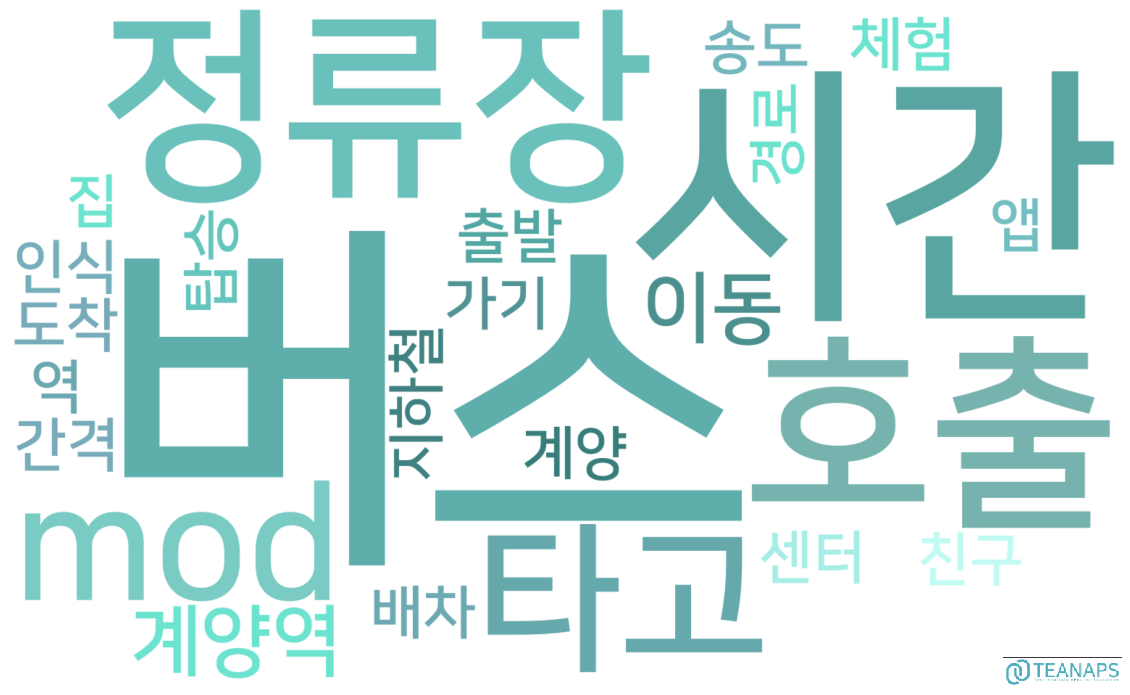

In [53]:
# TF-IDF 기준 워드클라우드를 출력합니다.
count_dict = tfidf.get_tfidf_dict()
tfidf.get_wordcloud(count_dict)

#### NNG_Token_Content_GO

In [54]:
tfidf.calculation_tfidf(livinglab["NNG_Token_Content_GO"], tfidf_count=100, tfidf_state=True)

In [55]:
print(tfidf.get_tf_list())

[['버스', 51], ['호출', 46], ['탑승', 45], ['시간', 42], ['도착', 37], ['배차', 29], ['정류장', 26], ['앱', 21], ['i-mod', 18], ['기사', 16], ['내부', 15], ['정도', 12], ['바로', 11], ['처음', 10], ['차량', 10], ['출발', 10], ['안', 9], ['목적지', 9], ['대기', 8], ['부분', 7], ['경로', 7], ['발판', 7], ['조금', 7], ['사람', 6], ['승객', 6], ['카드', 6], ['승차', 6], ['보고', 6], ['차', 6], ['아이', 6], ['운행', 6], ['탈', 5], ['근처', 5], ['나', 5], ['어플', 5], ['예상', 5], ['등록', 5], ['역', 5], ['예정', 5], ['다시', 5], ['마을', 5], ['일반', 5], ['결제', 5], ['택시', 4], ['더', 4], ['당황', 4], ['마음', 4], ['거리', 4], ['먼저', 4], ['모두', 4], ['안쪽', 4], ['분', 4], ['표시', 4], ['전', 4], ['탑승권', 4], ['측정', 4], ['노쇼', 4], ['소요', 4], ['계양', 4], ['계양역', 4], ['원래', 3], ['간격', 3], ['정말', 3], ['파크', 3], ['송도', 3], ['알림', 3], ['오지', 3], ['다음', 3], ['버스정류장', 3], ['회원', 3], ['신도시', 3], ['외곽', 3], ['확인', 3], ['역시', 3], ['달리', 3], ['제', 3], ['좀', 3], ['지도', 3], ['계속', 3], ['꽤', 3], ['코드', 3], ['명', 3], ['이동', 3], ['예약', 3], ['신청', 3], ['점', 3], ['하니', 2], ['노선', 2], ['거의', 2], ['완정역',

In [56]:
# TF/TF-IDF 계산결과를 그래프로 표현합니다.
# 그래프에 표현할 빈도기준 Top N 개를 숫자로 입력합니다.
tfidf.draw_tfidf(100)

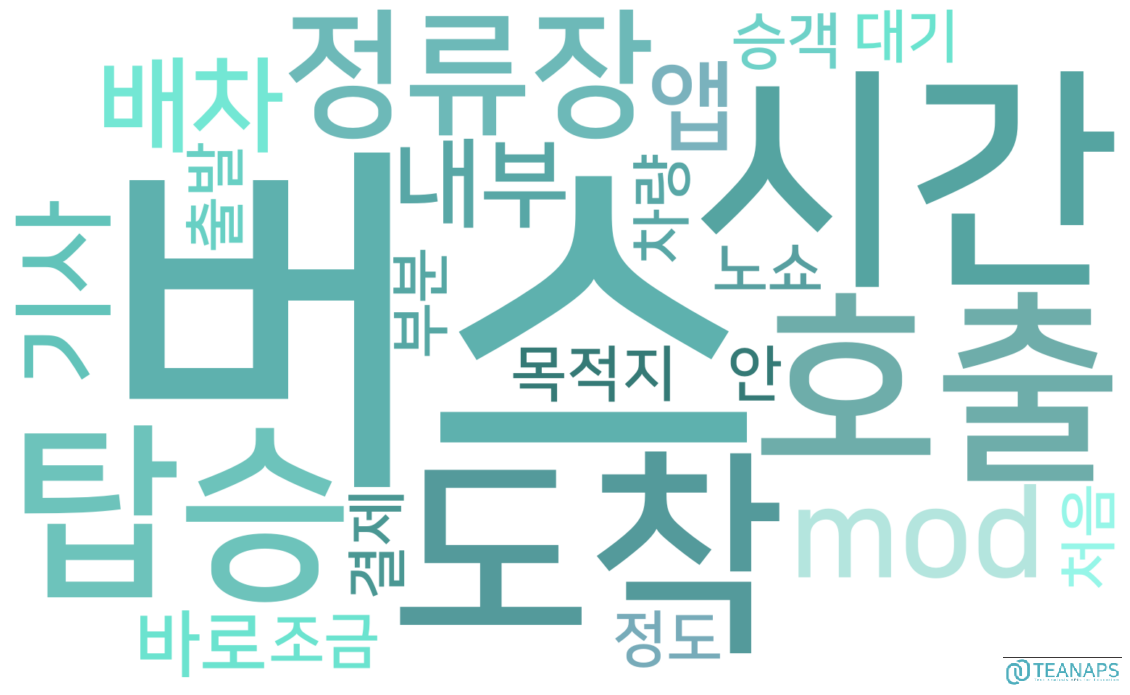

In [57]:
# TF-IDF 기준 워드클라우드를 출력합니다.
count_dict = tfidf.get_tfidf_dict()
tfidf.get_wordcloud(count_dict)

#### NNG_Token_Content_Goff

In [59]:
tfidf.calculation_tfidf(livinglab["NNG_Token_Content_Goff"], tfidf_count=100, tfidf_state=True)

In [60]:
print(tfidf.get_tf_list())

[['버스', 38], ['도착', 36], ['시간', 29], ['정류장', 24], ['하차', 22], ['이동', 21], ['탑승', 20], ['목적지', 20], ['지점', 14], ['택시', 13], ['사람', 13], ['기사', 12], ['i-mod', 11], ['바로', 10], ['계양역', 10], ['점', 9], ['더', 9], ['아이', 9], ['경로', 8], ['마을', 8], ['타고', 7], ['안내', 7], ['발판', 6], ['느낌', 6], ['배차', 6], ['추가', 6], ['집', 5], ['일반', 5], ['확인', 5], ['안', 5], ['조금', 5], ['교통', 5], ['만약', 5], ['솔밭', 5], ['앱', 5], ['방면', 4], ['승객', 4], ['방향', 4], ['혼자', 4], ['나', 4], ['영어', 4], ['신도시', 4], ['아파트', 4], ['호출', 4], ['말씀', 4], ['거리', 4], ['길', 4], ['계양', 4], ['위치', 4], ['어플', 4], ['촌', 4], ['듯', 3], ['내부', 3], ['도보', 3], ['선택', 3], ['약간', 3], ['미리', 3], ['중간', 3], ['탈', 3], ['손님', 3], ['결제', 3], ['동네', 3], ['아라동', 3], ['센터', 3], ['비교', 3], ['완', 3], ['정역', 3], ['소요', 3], ['대기', 3], ['준비', 3], ['전', 3], ['자동', 3], ['유턴', 3], ['정도', 3], ['뿐', 3], ['활성화', 3], ['태그', 2], ['코드', 2], ['최종', 2], ['처음', 2], ['정해진', 2], ['라면', 2], ['완정역', 2], ['정차', 2], ['가기', 2], ['서비스', 2], ['고민', 2], ['상권', 2], ['형성', 2], ['기존'

In [61]:
# TF/TF-IDF 계산결과를 그래프로 표현합니다.
# 그래프에 표현할 빈도기준 Top N 개를 숫자로 입력합니다.
tfidf.draw_tfidf(100)

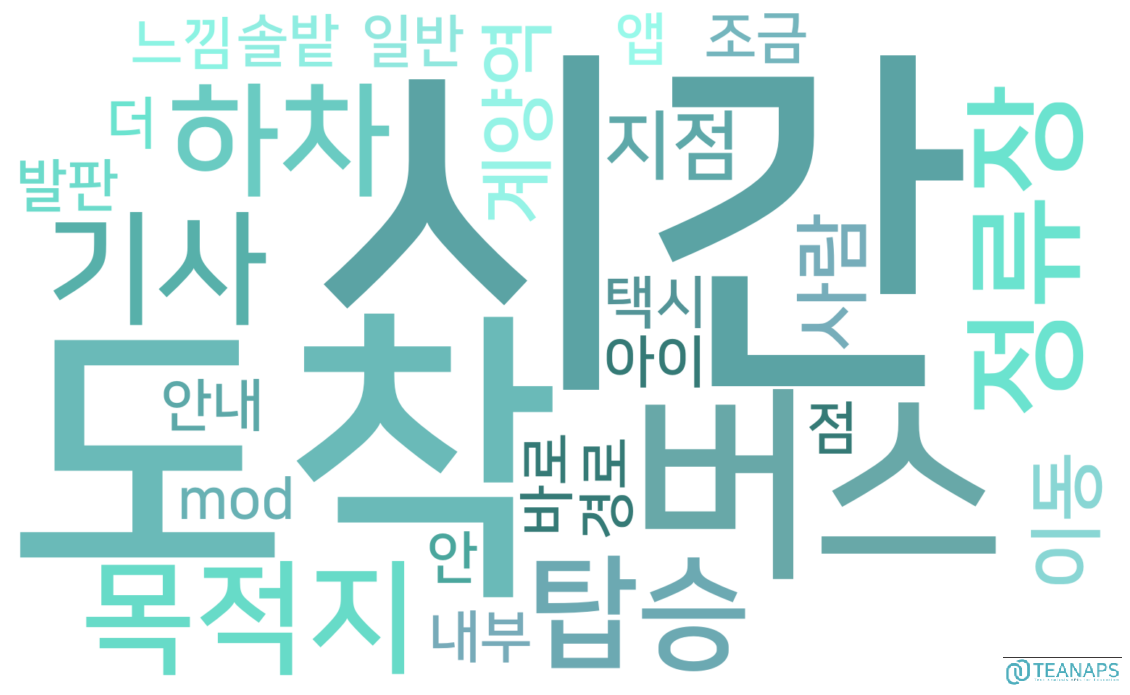

In [62]:
# TF-IDF 기준 워드클라우드를 출력합니다.
count_dict = tfidf.get_tfidf_dict()
tfidf.get_wordcloud(count_dict)

#### NNG_Token_Content_ep

In [63]:
tfidf.calculation_tfidf(livinglab["NNG_Token_Content_ep"], tfidf_count=100, tfidf_state=True)

In [64]:
print(tfidf.get_tf_list())

[['버스', 36], ['점', 27], ['시간', 20], ['호출', 18], ['정류장', 17], ['앱', 17], ['택시', 16], ['도착', 13], ['사람', 13], ['서비스', 12], ['운행', 12], ['i-mod', 12], ['배차', 11], ['이동', 11], ['결제', 11], ['타고', 10], ['환승', 10], ['탑승', 10], ['가격', 9], ['처음', 8], ['더', 8], ['방법', 8], ['요금', 8], ['거리', 7], ['노선', 7], ['예상', 7], ['확인', 7], ['운영', 6], ['목적지', 6], ['지하철', 6], ['하차', 6], ['다시', 6], ['계양역', 6], ['기사', 6], ['매우', 5], ['계양', 5], ['송도', 5], ['기존', 5], ['대중교통', 5], ['위치', 5], ['전혀', 5], ['검색', 5], ['홍보', 5], ['예약', 5], ['내부', 5], ['일반', 5], ['안', 4], ['수단', 4], ['신도시', 4], ['고려', 4], ['비교', 4], ['집', 4], ['분', 4], ['거', 4], ['무엇', 4], ['무척', 4], ['어려움', 4], ['다만', 4], ['활성화', 4], ['정말', 4], ['크게', 4], ['주말', 4], ['조금', 4], ['사용', 4], ['라면', 3], ['우선', 3], ['환경', 3], ['가장', 3], ['점검', 3], ['안내', 3], ['교통', 3], ['나', 3], ['탈', 3], ['역', 3], ['계속', 3], ['경로', 3], ['목적', 3], ['범위', 3], ['주민', 3], ['소요', 3], ['단지', 3], ['근거리', 3], ['평일', 3], ['화면', 3], ['등록', 3], ['기능', 3], ['출발', 3], ['차', 3], ['창문', 3],

In [65]:
# TF/TF-IDF 계산결과를 그래프로 표현합니다.
# 그래프에 표현할 빈도기준 Top N 개를 숫자로 입력합니다.
tfidf.draw_tfidf(100)

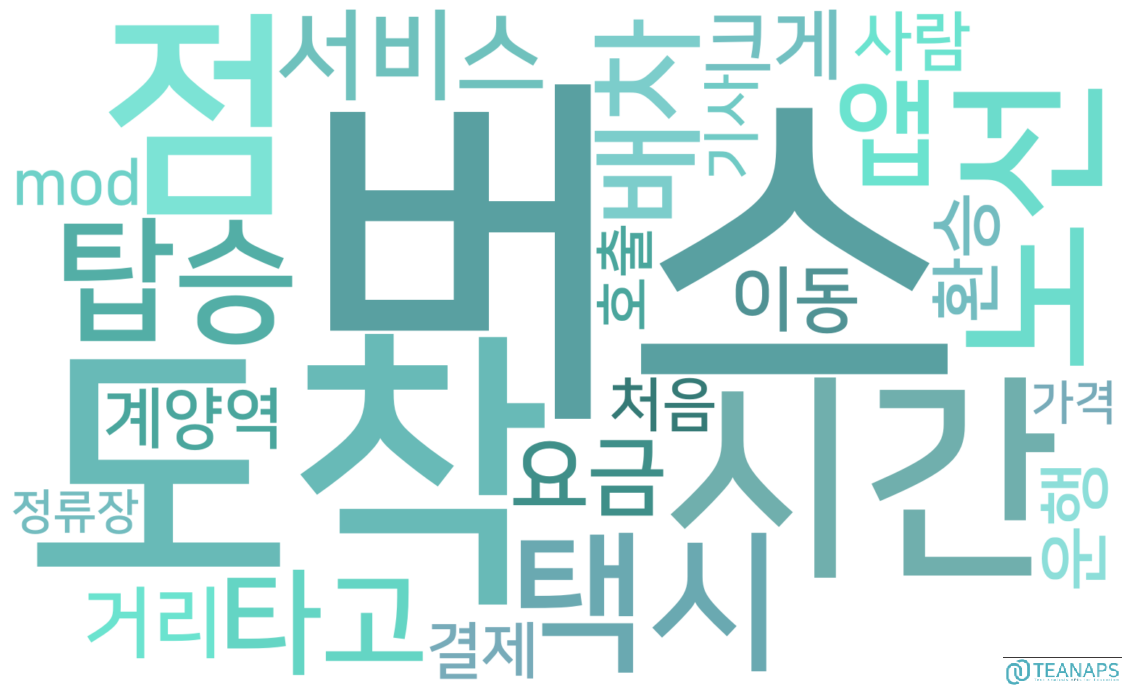

In [66]:
# TF-IDF 기준 워드클라우드를 출력합니다.
count_dict = tfidf.get_tfidf_dict()
tfidf.get_wordcloud(count_dict)

#### NNG_Token_Content_re

In [67]:
tfidf.calculation_tfidf(livinglab["NNG_Token_Content_re"], tfidf_count=100, tfidf_state=True)

In [68]:
print(tfidf.get_tf_list())

[['버스', 52], ['추천', 42], ['이유', 25], ['사람', 24], ['시간', 20], ['배차', 20], ['탑승', 17], ['더', 15], ['점', 14], ['짐', 13], ['택시', 13], ['목적지', 13], ['정류장', 12], ['i-mod', 12], ['이동', 11], ['호출', 11], ['대중교통', 9], ['아이', 9], ['분', 8], ['서비스', 8], ['간격', 8], ['기능', 8], ['신도시', 7], ['추가', 7], ['도착', 7], ['홍보', 7], ['노선', 7], ['가기', 6], ['환승', 6], ['배달', 6], ['가지', 6], ['계양역', 6], ['이상', 6], ['결제', 6], ['부모님', 6], ['계양', 6], ['교통', 5], ['송도', 5], ['기사', 5], ['명', 5], ['앱', 5], ['어플', 5], ['집', 5], ['일반', 5], ['사용', 5], ['거리', 4], ['발판', 4], ['지하철', 4], ['바로', 4], ['경로', 4], ['인원', 4], ['타고', 4], ['실제', 4], ['수단', 4], ['부분', 4], ['모임', 4], ['인천대학교', 4], ['비교', 4], ['요금', 4], ['알림', 4], ['자주', 4], ['운행', 4], ['처음', 4], ['날', 3], ['진행', 3], ['거의', 3], ['음식', 3], ['평소', 3], ['오늘', 3], ['안쪽', 3], ['방법', 3], ['시설', 3], ['마트', 3], ['운영', 3], ['개선', 3], ['확장', 3], ['먼저', 3], ['활용', 3], ['혜택', 3], ['표시', 3], ['네이버', 3], ['길찾기', 3], ['사시', 3], ['아이트립', 3], ['좀', 3], ['듯', 3], ['장점', 3], ['꼭', 3], ['체험', 

In [69]:
# TF/TF-IDF 계산결과를 그래프로 표현합니다.
# 그래프에 표현할 빈도기준 Top N 개를 숫자로 입력합니다.
tfidf.draw_tfidf(100)

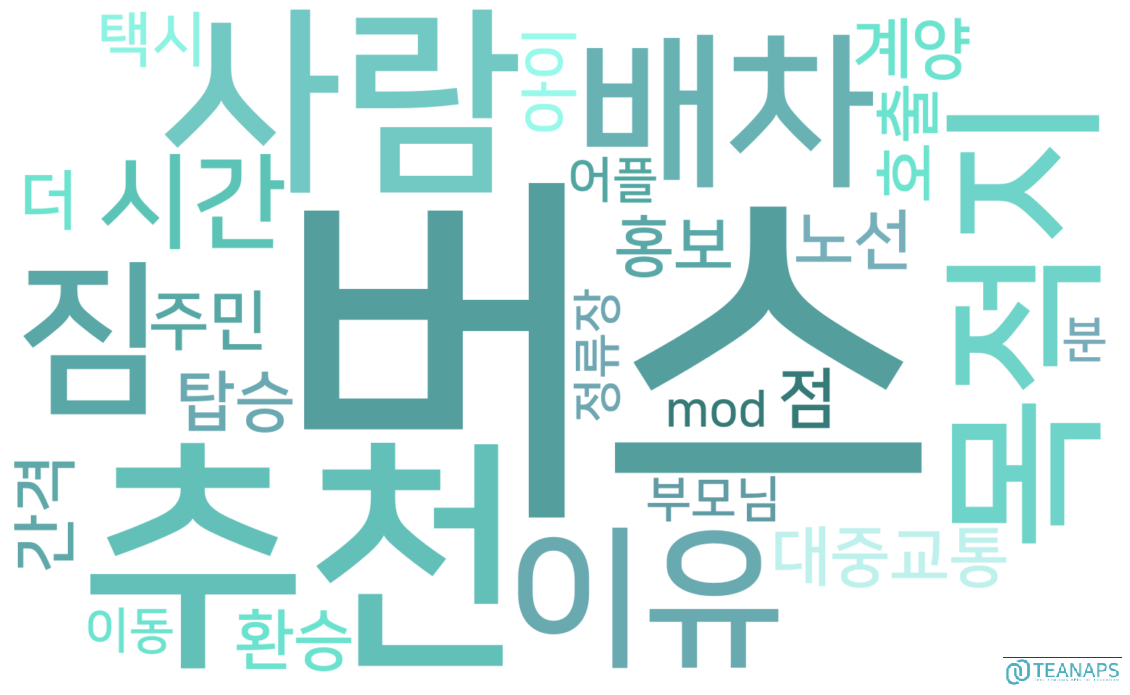

In [70]:
# TF-IDF 기준 워드클라우드를 출력합니다.
count_dict = tfidf.get_tfidf_dict()
tfidf.get_wordcloud(count_dict)